In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
import numpy as np

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from matplotlib.colors import ListedColormap

In [7]:
import itertools

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Feature Names

1. Sample code number: id number 
2. Clump Thickness: 1 - 10 
3. Uniformity of Cell Size: 1 - 10 
4. Uniformity of Cell Shape: 1 - 10 
5. Marginal Adhesion: 1 - 10 
6. Single Epithelial Cell Size: 1 - 10 
7. Bare Nuclei: 1 - 10 
8. Bland Chromatin: 1 - 10 
9. Normal Nucleoli: 1 - 10 
10. Mitoses: 1 - 10 
11. Class: (2 for benign, 4 for malignant)


In [10]:
colnames = ['id', 'thickness', 'uniformity_size', 'uniformity_shape',
           'marg_adh', 's_sec', 'nuc_bare', 'chrom_bl', 'nuc_normal', 'mitosis', 'class']
df = pd.read_csv('data.csv',header=None, names=colnames, na_values=['?'], keep_default_na=False)
df['class'] = ((df['class'] - 2)/2).astype('int64')

In [11]:
class_names = ['benign', 'malignant']

In [12]:
df.describe()

,id,thickness,uniformity_size,uniformity_shape,marg_adh,s_sec,nuc_bare,chrom_bl,nuc_normal,mitosis,class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.344778
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


## Check for Duplicates

Duplicate entries from the same breast tissue could cause problems in classification for some models. Given there are only 54 duplicated entries out of our set of 699 entries, the duplicate entries will be dropped. This only reduces our data set to 691 unique id entries. 

In [13]:
df.duplicated(subset='id').sum()

54

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.count()

id                  691
thickness           691
uniformity_size     691
uniformity_shape    691
marg_adh            691
s_sec               691
nuc_bare            675
chrom_bl            691
nuc_normal          691
mitosis             691
class               691
dtype: int64

In [16]:
df = df.dropna()

In [17]:
df.count()

id                  675
thickness           675
uniformity_size     675
uniformity_shape    675
marg_adh            675
s_sec               675
nuc_bare            675
chrom_bl            675
nuc_normal          675
mitosis             675
class               675
dtype: int64

## Data Exploration & Feature Visualzation

Below we plot histograms of the values of our feature (and the class)

Some things to note: class distribution is not equal. There are about twice as many benign samples as malignant samples.

Ways to fix:

   - can use stratified_y equals in train_test_select (ask Jill)
   - some regression models have way to 'balance' training data 
   - SMOKE
   - bootstrap

??Why doesn't `nuc_bare` show up in the histogram below or the describe above?
    Answer: some of the values for `nuc_bar` contain a `?`


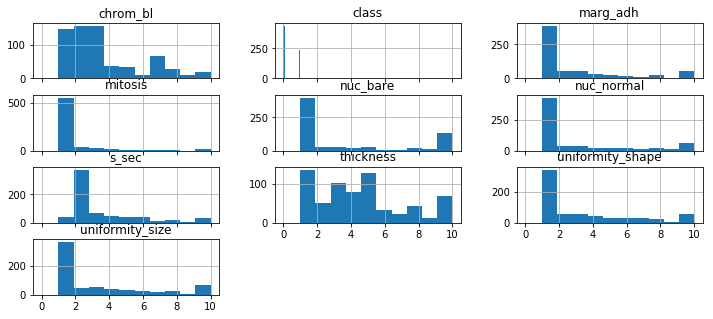

In [18]:
h = df.hist(column=colnames[1:], figsize=(12,5), sharex=True)

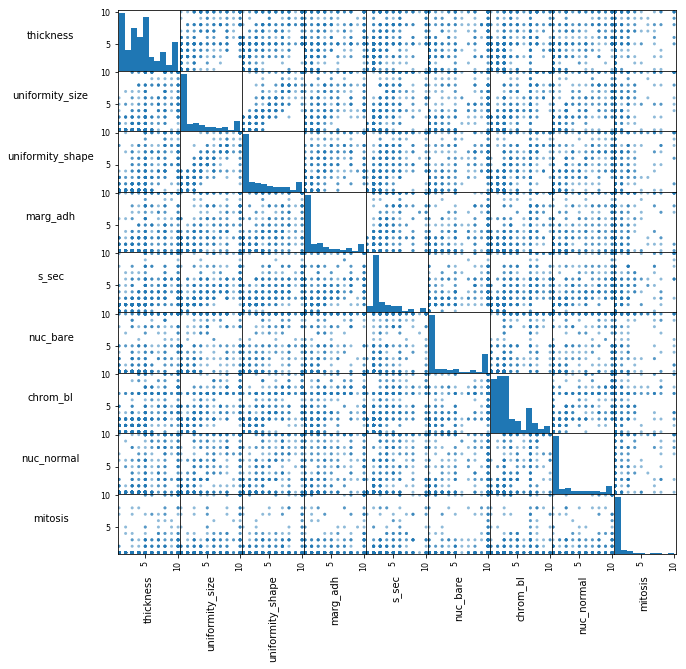

In [19]:
plts = pd.plotting.scatter_matrix(df[colnames[1:-1]], figsize=(10,10))

for x in range(len(plts)):
    for y in range(len(plts)):
        # to get the axis of subplots
        ax = plts[x, y]
        # to make x axis name vertical  
        ax.xaxis.label.set_rotation(90)
        # to make y axis name horizontal 
        ax.yaxis.label.set_rotation(0)
        # to make sure y axis names are outside the plot area
        ax.yaxis.labelpad = 50

In [20]:
X_train, X_test, y_train, y_test = train_test_split(df[colnames[1:-1]], df['class'])

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(506, 9)
(169, 9)
(506,)
(169,)


In [22]:
X_trainv, X_testv, y_trainv, y_testv = X_train.values, X_test.values, y_train.values, y_test.values

In [23]:
X_train.columns

Index(['thickness', 'uniformity_size', 'uniformity_shape', 'marg_adh', 's_sec',
       'nuc_bare', 'chrom_bl', 'nuc_normal', 'mitosis'],
      dtype='object')

/Users/adam/anaconda3/envs/week5datachallenge_breastcancer/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


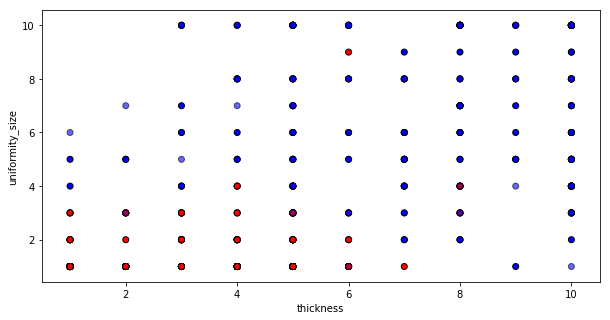

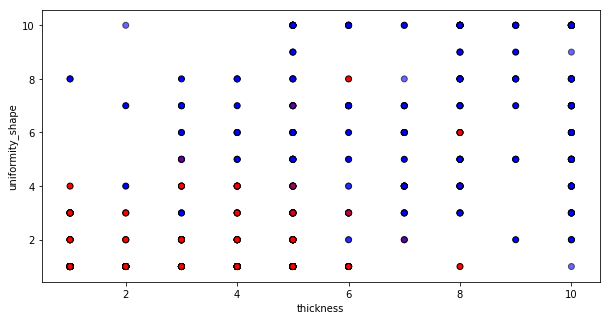

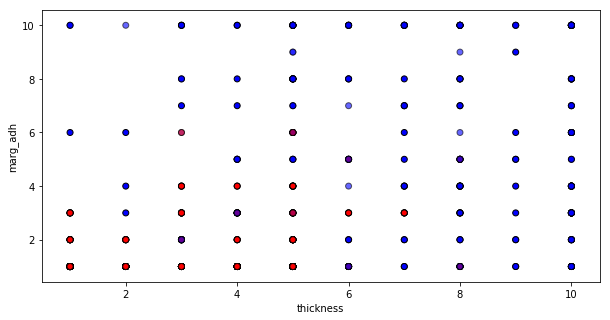

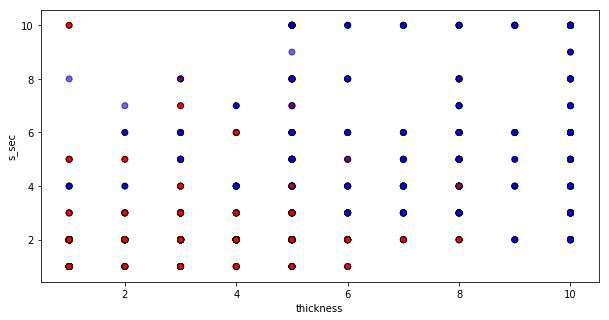

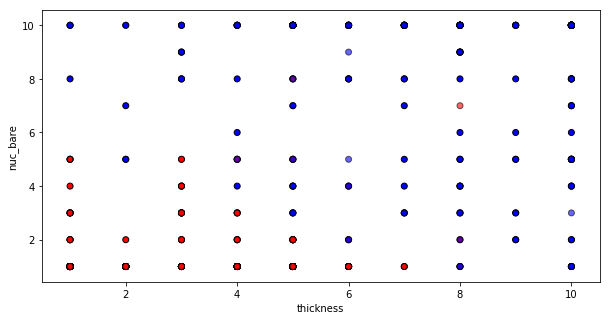

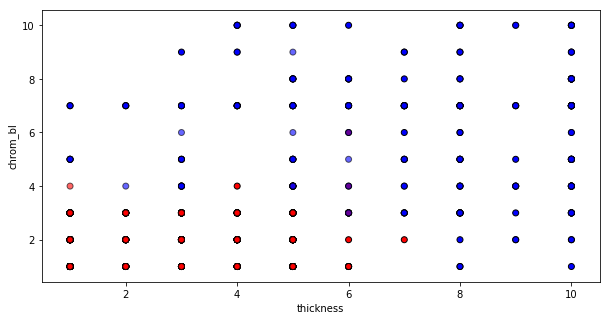

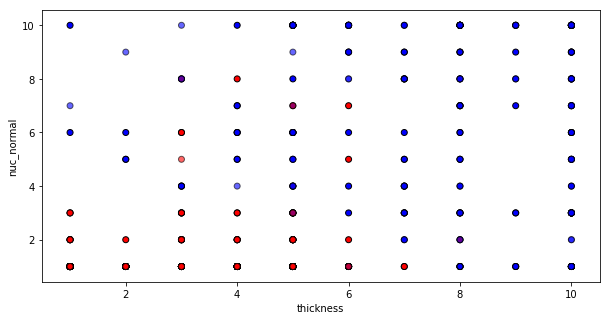

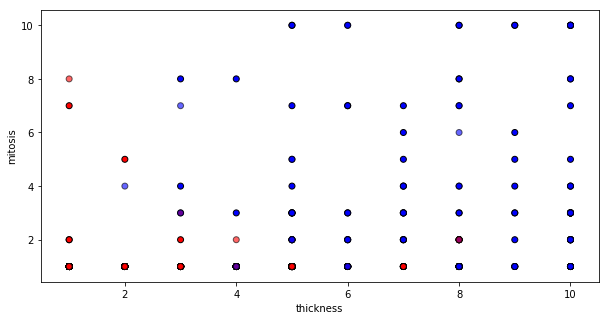

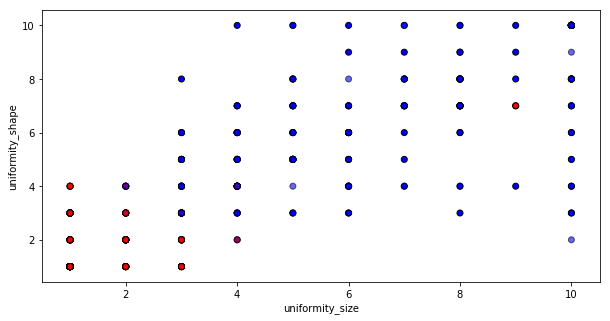

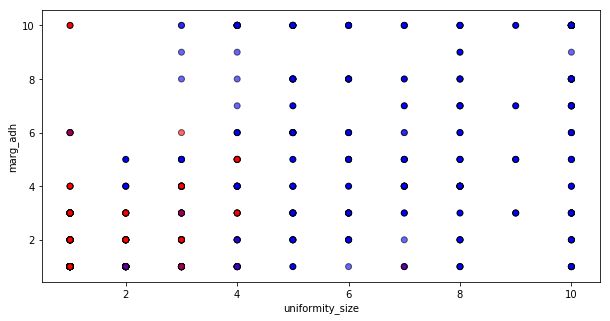

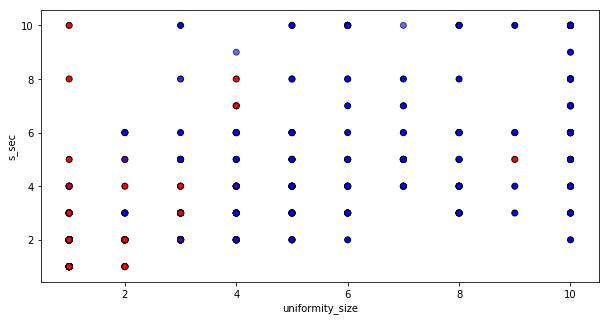

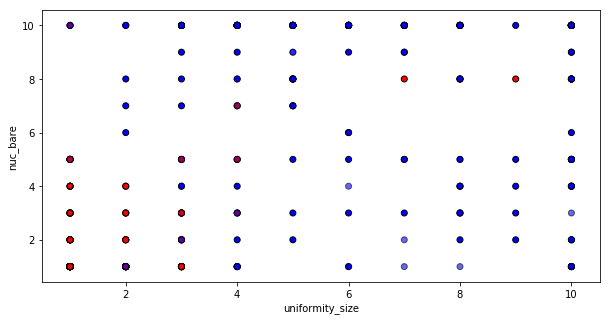

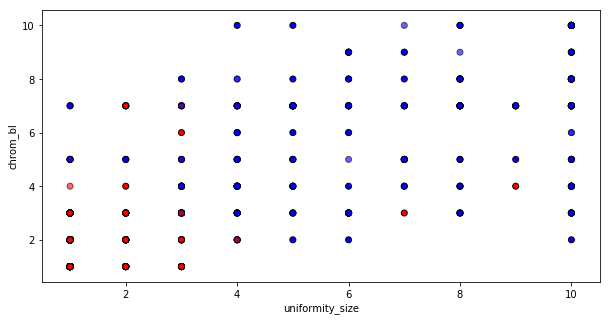

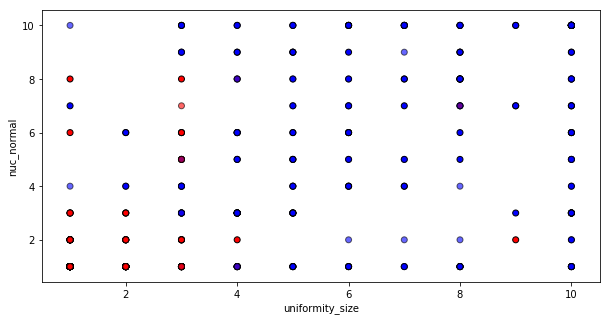

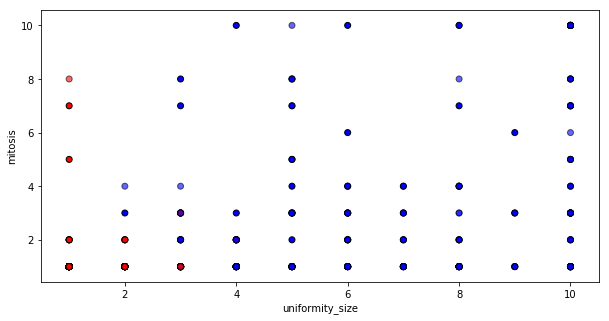

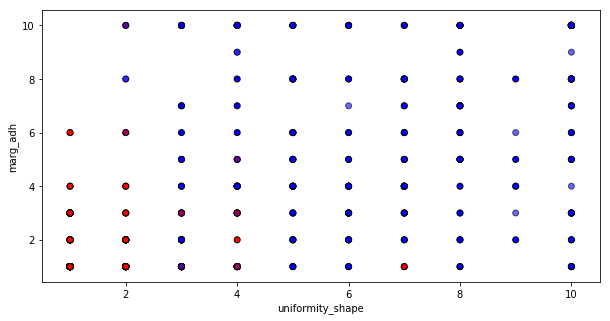

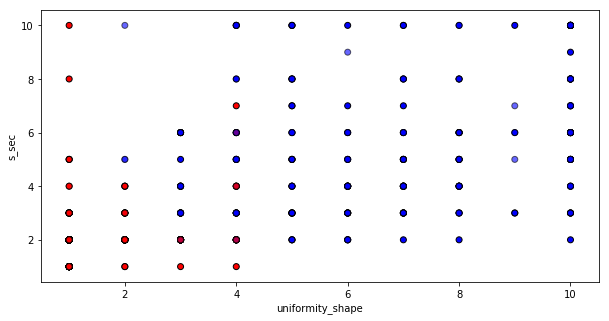

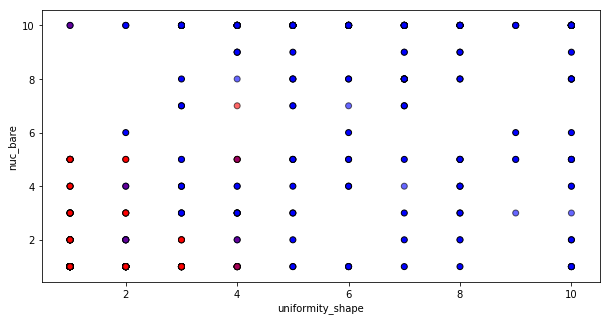

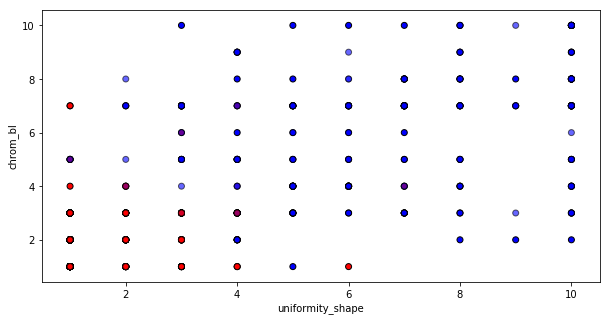

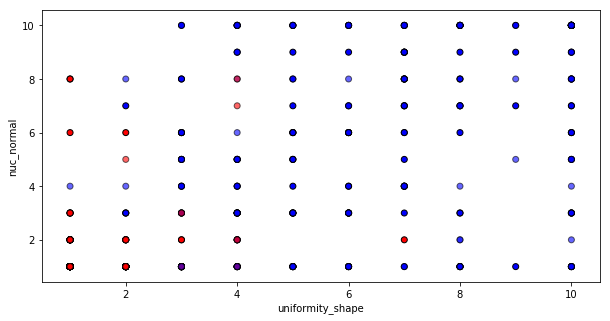

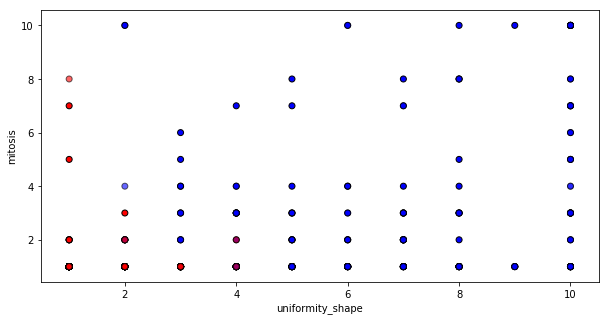

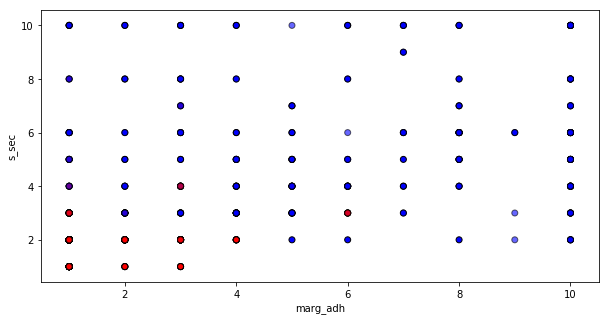

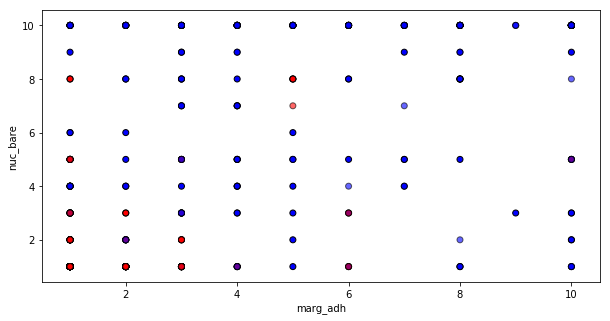

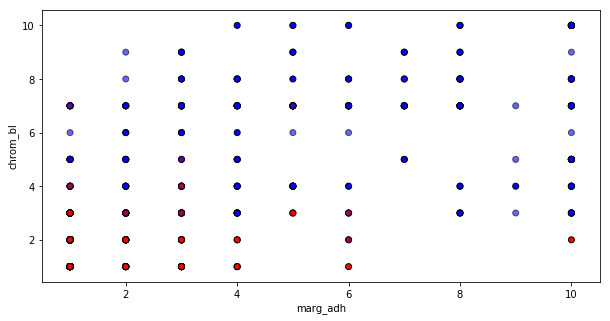

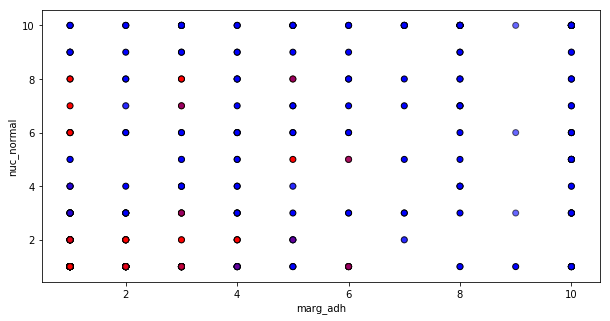

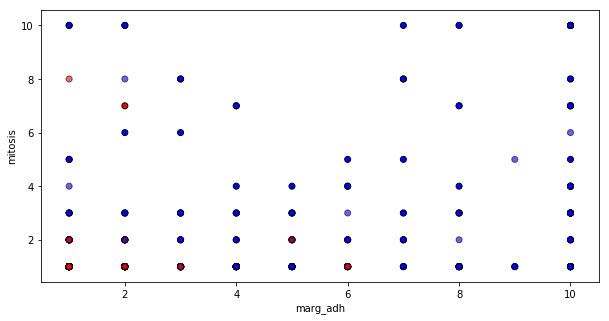

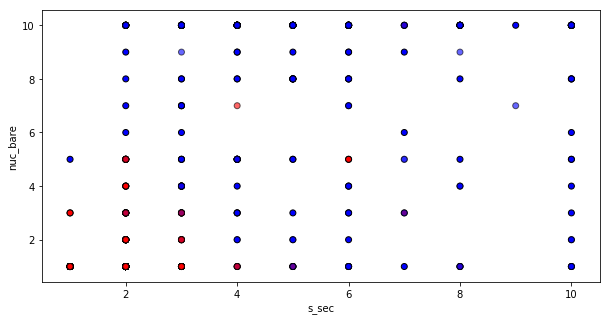

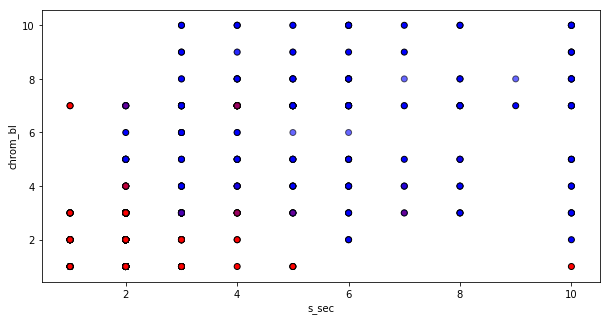

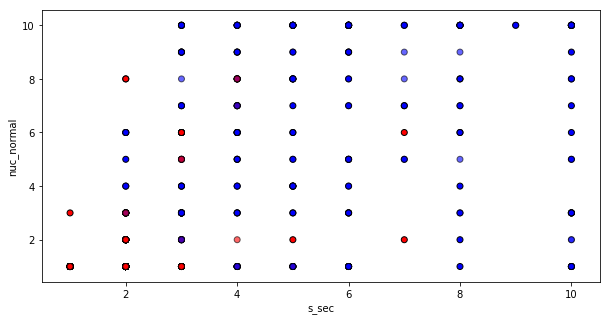

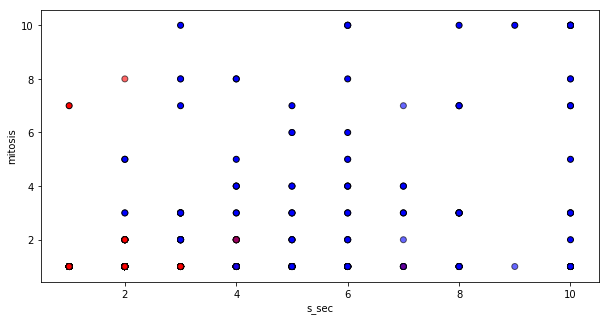

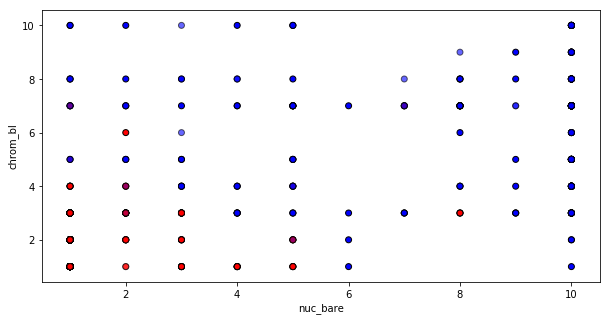

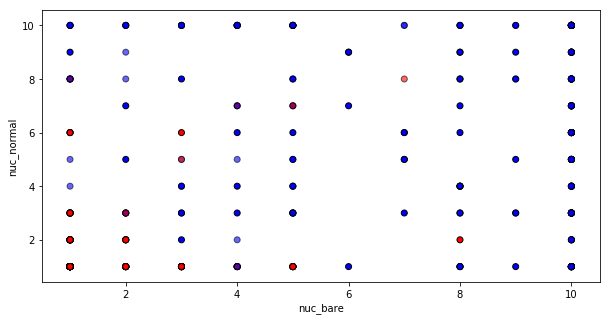

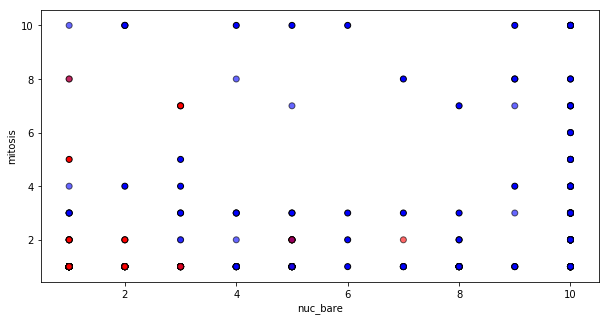

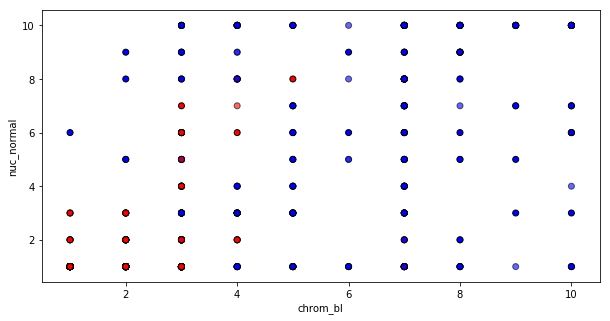

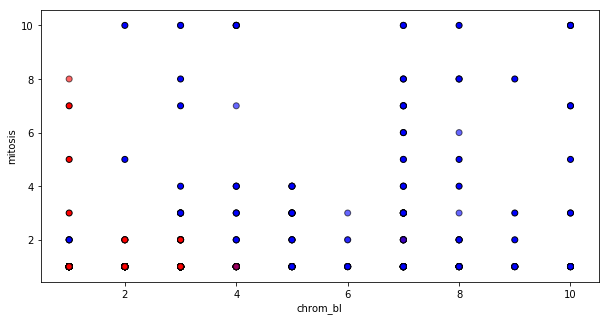

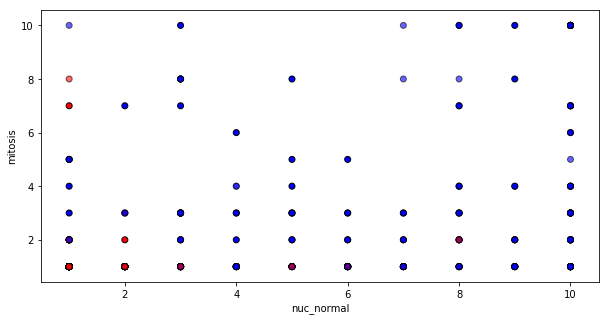

In [24]:
combs = list(itertools.combinations(X_train.columns, 2))


# will want to view over N^2/2 - N plots for each pair of features
# just plot the dataset first

y_trainv = y_train.values
y_testv = y_test.values
    
i = 1
figs = []
axs = []
for X_horiz, X_vert in combs:
    
    X_trainv = X_train[[X_horiz,X_vert]].values
    X_testv = X_test[[X_horiz,X_vert]].values
    
    figure = plt.figure(figsize=(10, 5))
    figs.append(figure)
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    #ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    #ax = plt.subplot(len(combs), len(combs), i)
    ax = plt.subplot(1, 1, 1)
    axs.append(ax)

#     X, y = ds
#     X = StandardScaler().fit_transform(X)
#     X_train, X_test, y_train, y_test = \
#         train_test_split(X, y, test_size=.4, random_state=42)

#     x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
#     y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    
#     x_min = 0
#     x_max = 10
#     y_min = 0
#     y_max = 450
#     s = 1
#     xx, yy = np.meshgrid(np.arange(x_min, x_max, s),
#                              np.arange(y_min, y_max, s))

    #ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_trainv[:, 0], X_trainv[:, 1], c=y_trainv, cmap=cm_bright,
               edgecolors='k')
    # and testing points
    ax.scatter(X_testv[:, 0], X_testv[:, 1], c=y_testv, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    #ax.set_xlim(xx.min(), xx.max())
    #ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel(X_horiz)
    ax.set_ylabel(X_vert)
    
     
    i += 1
    
    
for ff in figs:
    del ff
for aa in axs:
    del aa

## Model Selection

Given the view of the data above, the problem appears to be straightforward and a number of classification techniques could be considered. The data set is not large, so something like kNN could be used. Following the [recommendations here](scikit learn algorithm cheat sheet pdf), we'll start with a linear support vector classifier and then also use a kNN. 

Also to note are the features are scaled from 1 to 10 and all somewhat similary distributed. Therefore, no feature scaling should be necessary before training a model.

In [25]:
clf = SVC(kernel="linear", C=0.025)

In [26]:
clf.fit(X_trainv, y_trainv)
score = clf.score(X_testv, y_testv)

In [27]:
score

0.893491124260355

In [28]:
## Need to choose a model and report 
## confusion matrix, F1 score and ROC curve


In [29]:
y_pred = clf.predict(X_testv)

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[95  4]
 [14 56]]
Normalized confusion matrix
[[0.96 0.04]
 [0.2  0.8 ]]


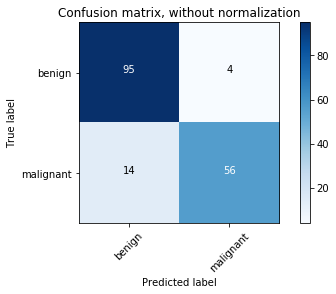

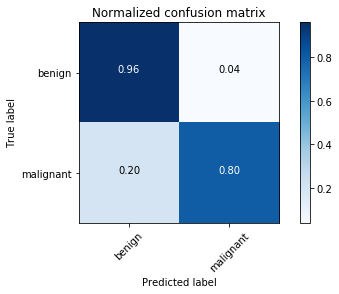

In [35]:
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

In [30]:
y_score = clf.decision_function(X_testv)

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(y_testv, y_score)

In [39]:
roc_auc = metrics.auc(fpr, tpr)

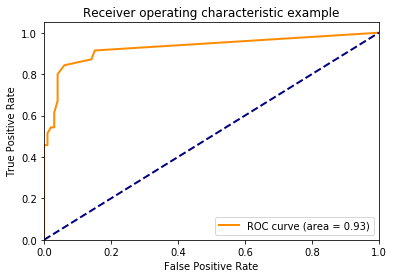

In [40]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [87]:
names = ["Logistic Regression","Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

for i in range(len(classifiers)):
    classifiers[i]._name = names[i]


In [88]:
for clf in classifiers:
    clf.fit(X_trainv, y_trainv)
    score = clf.score(X_testv, y_testv)
    print(clf._name, score)
    

Logistic Regression 0.9132947976878613
Nearest Neighbors 0.8728323699421965
Linear SVM 0.9190751445086706
RBF SVM 0.9132947976878613
Gaussian Process 0.9248554913294798
Decision Tree 0.9132947976878613
Random Forest 0.930635838150289
Neural Net 0.9190751445086706
AdaBoost 0.9248554913294798
Naive Bayes 0.9132947976878613
QDA 0.9132947976878613
